<a href="https://colab.research.google.com/github/uxjourney/uxjourneyproductivity/blob/main/Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from markovchain import MarkovChain

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
raw_df

,ID,a,b,c,d,e,f,g,h,i,...,p,q,r,s,t,u,v,w,x,y
0,2.020000e+14,20.0,30.0,40.0,30.0,20.0,25.0,30.0,150.0,60.0,...,15.0,10.0,60.0,30.0,70.0,135.0,5.0,10.0,65.0,15.0
1,2.020000e+14,10.0,10.0,10.0,10.0,10.0,20.0,10.0,20.0,30.0,...,60.0,30.0,30.0,20.0,120.0,120.0,30.0,30.0,60.0,10.0
2,2.020000e+14,10.0,10.0,45.0,20.0,30.0,30.0,50.0,60.0,60.0,...,60.0,60.0,30.0,20.0,240.0,120.0,90.0,30.0,120.0,20.0
3,2.020000e+14,10.0,10.0,45.0,20.0,30.0,30.0,50.0,75.0,60.0,...,60.0,60.0,30.0,20.0,240.0,120.0,45.0,75.0,120.0,20.0
4,2.020000e+14,10.0,10.0,45.0,20.0,30.0,30.0,50.0,75.0,60.0,...,60.0,60.0,30.0,20.0,240.0,120.0,45.0,75.0,120.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2.020000e+14,20.0,20.0,12.0,20.0,40.0,20.0,20.0,20.0,20.0,...,10.0,15.0,NaN,NaN,NaN,10.0,15.0,10.0,10.0,20.0
573,2.020000e+14,10.0,10.0,10.0,10.0,5.0,5.0,7.0,40.0,5.0,...,20.0,10.0,60.0,10.0,45.0,5.0,NaN,4.0,10.0,5.0
574,2.020000e+14,10.0,10.0,10.0,10.0,5.0,5.0,7.0,40.0,5.0,...,20.0,10.0,60.0,10.0,45.0,5.0,NaN,4.0,10.0,5.0
575,2.020000e+14,10.0,10.0,10.0,10.0,5.0,5.0,7.0,40.0,5.0,...,20.0,10.0,60.0,10.0,45.0,5.0,NaN,4.0,10.0,5.0


In [ ]:
raw_df = raw_df.replace(0, np.nan)
raw_df = raw_df.replace(0.0, np.nan)

In [ ]:
for x in raw_df.columns:
    raw_df.loc[raw_df[x].notna(), x] = x
print(raw_df)

     ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u    v  w  x  y
0    ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u    v  w  x  y
1    ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u    v  w  x  y
2    ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u    v  w  x  y
3    ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u    v  w  x  y
4    ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u    v  w  x  y
..   .. .. .. .. .. .. .. .. .. ..  ... .. ..  ...  ...  ... ..  ... .. .. ..
572  ID  a  b  c  d  e  f  g  h  i  ...  p  q  NaN  NaN  NaN  u    v  w  x  y
573  ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u  NaN  w  x  y
574  ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u  NaN  w  x  y
575  ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u  NaN  w  x  y
576  ID  a  b  c  d  e  f  g  h  i  ...  p  q    r    s    t  u  NaN  w  x  y

[577 rows x 26 columns]


In [ ]:
na_count = []
for x in raw_df.columns:
    if x != 'ID':
        na_count.append(raw_df[x].isna().sum())
print(na_count)

[9, 1, 0, 5, 8, 8, 1, 8, 5, 12, 15, 13, 28, 20, 21, 21, 32, 23, 21, 21, 45, 47, 43, 37, 40]


In [ ]:
df = raw_df.drop('ID', axis=1)

In [ ]:
data = df.values.tolist()
# Remove NaN values from each row
data = [[value for value in row if pd.notna(value)] for row in data]

print(data)

[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',

In [ ]:
#penambahan list oleh task yang mengulang
for x in list(range(len(na_count))):
    data.append([df.columns[(x)]]*(na_count[x] + 1))

In [ ]:
from collections import defaultdict

def calculate_transition_probabilities(sequences):
    transition_counts = defaultdict(lambda: defaultdict(int))

    for sequence in sequences:
        states = sequence

        for i in range(len(states) - 1):
            current_state = states[i]
            next_state = states[i + 1]
            transition_counts[current_state][next_state] += 1

    transition_probabilities = {}

    for current_state, transitions in transition_counts.items():
        total_transitions = sum(transitions.values())
        probabilities = {next_state: count / total_transitions for next_state, count in transitions.items()}
        transition_probabilities[current_state] = probabilities

    return transition_probabilities

# Define the list of sequences
sequences = data

# Calculate the transition probabilities
transition_probabilities = calculate_transition_probabilities(sequences)

# Print the transition probabilities
for current_state, probabilities in transition_probabilities.items():
    print(f"Transition probabilities for state {current_state}: {probabilities}")

Transition probabilities for state a: {'b': 0.9826689774696707, 'c': 0.0017331022530329288, 'a': 0.01559792027729636}
Transition probabilities for state b: {'c': 0.9982668977469671, 'b': 0.0017331022530329288}
Transition probabilities for state c: {'d': 0.9913344887348353, 'e': 0.0034662045060658577, 'g': 0.0034662045060658577, 'f': 0.0017331022530329288}
Transition probabilities for state d: {'e': 0.9826689774696707, 'g': 0.008665511265164644, 'd': 0.008665511265164644}
Transition probabilities for state e: {'f': 0.9844020797227037, 'g': 0.0017331022530329288, 'e': 0.01386481802426343}
Transition probabilities for state f: {'g': 0.9861111111111112, 'f': 0.013888888888888888}
Transition probabilities for state g: {'h': 0.9912891986062717, 'i': 0.005226480836236934, 'j': 0.0017421602787456446, 'g': 0.0017421602787456446}
Transition probabilities for state h: {'i': 0.9861351819757366, 'h': 0.01386481802426343}
Transition probabilities for state i: {'j': 0.9774696707105719, 'k': 0.0069324

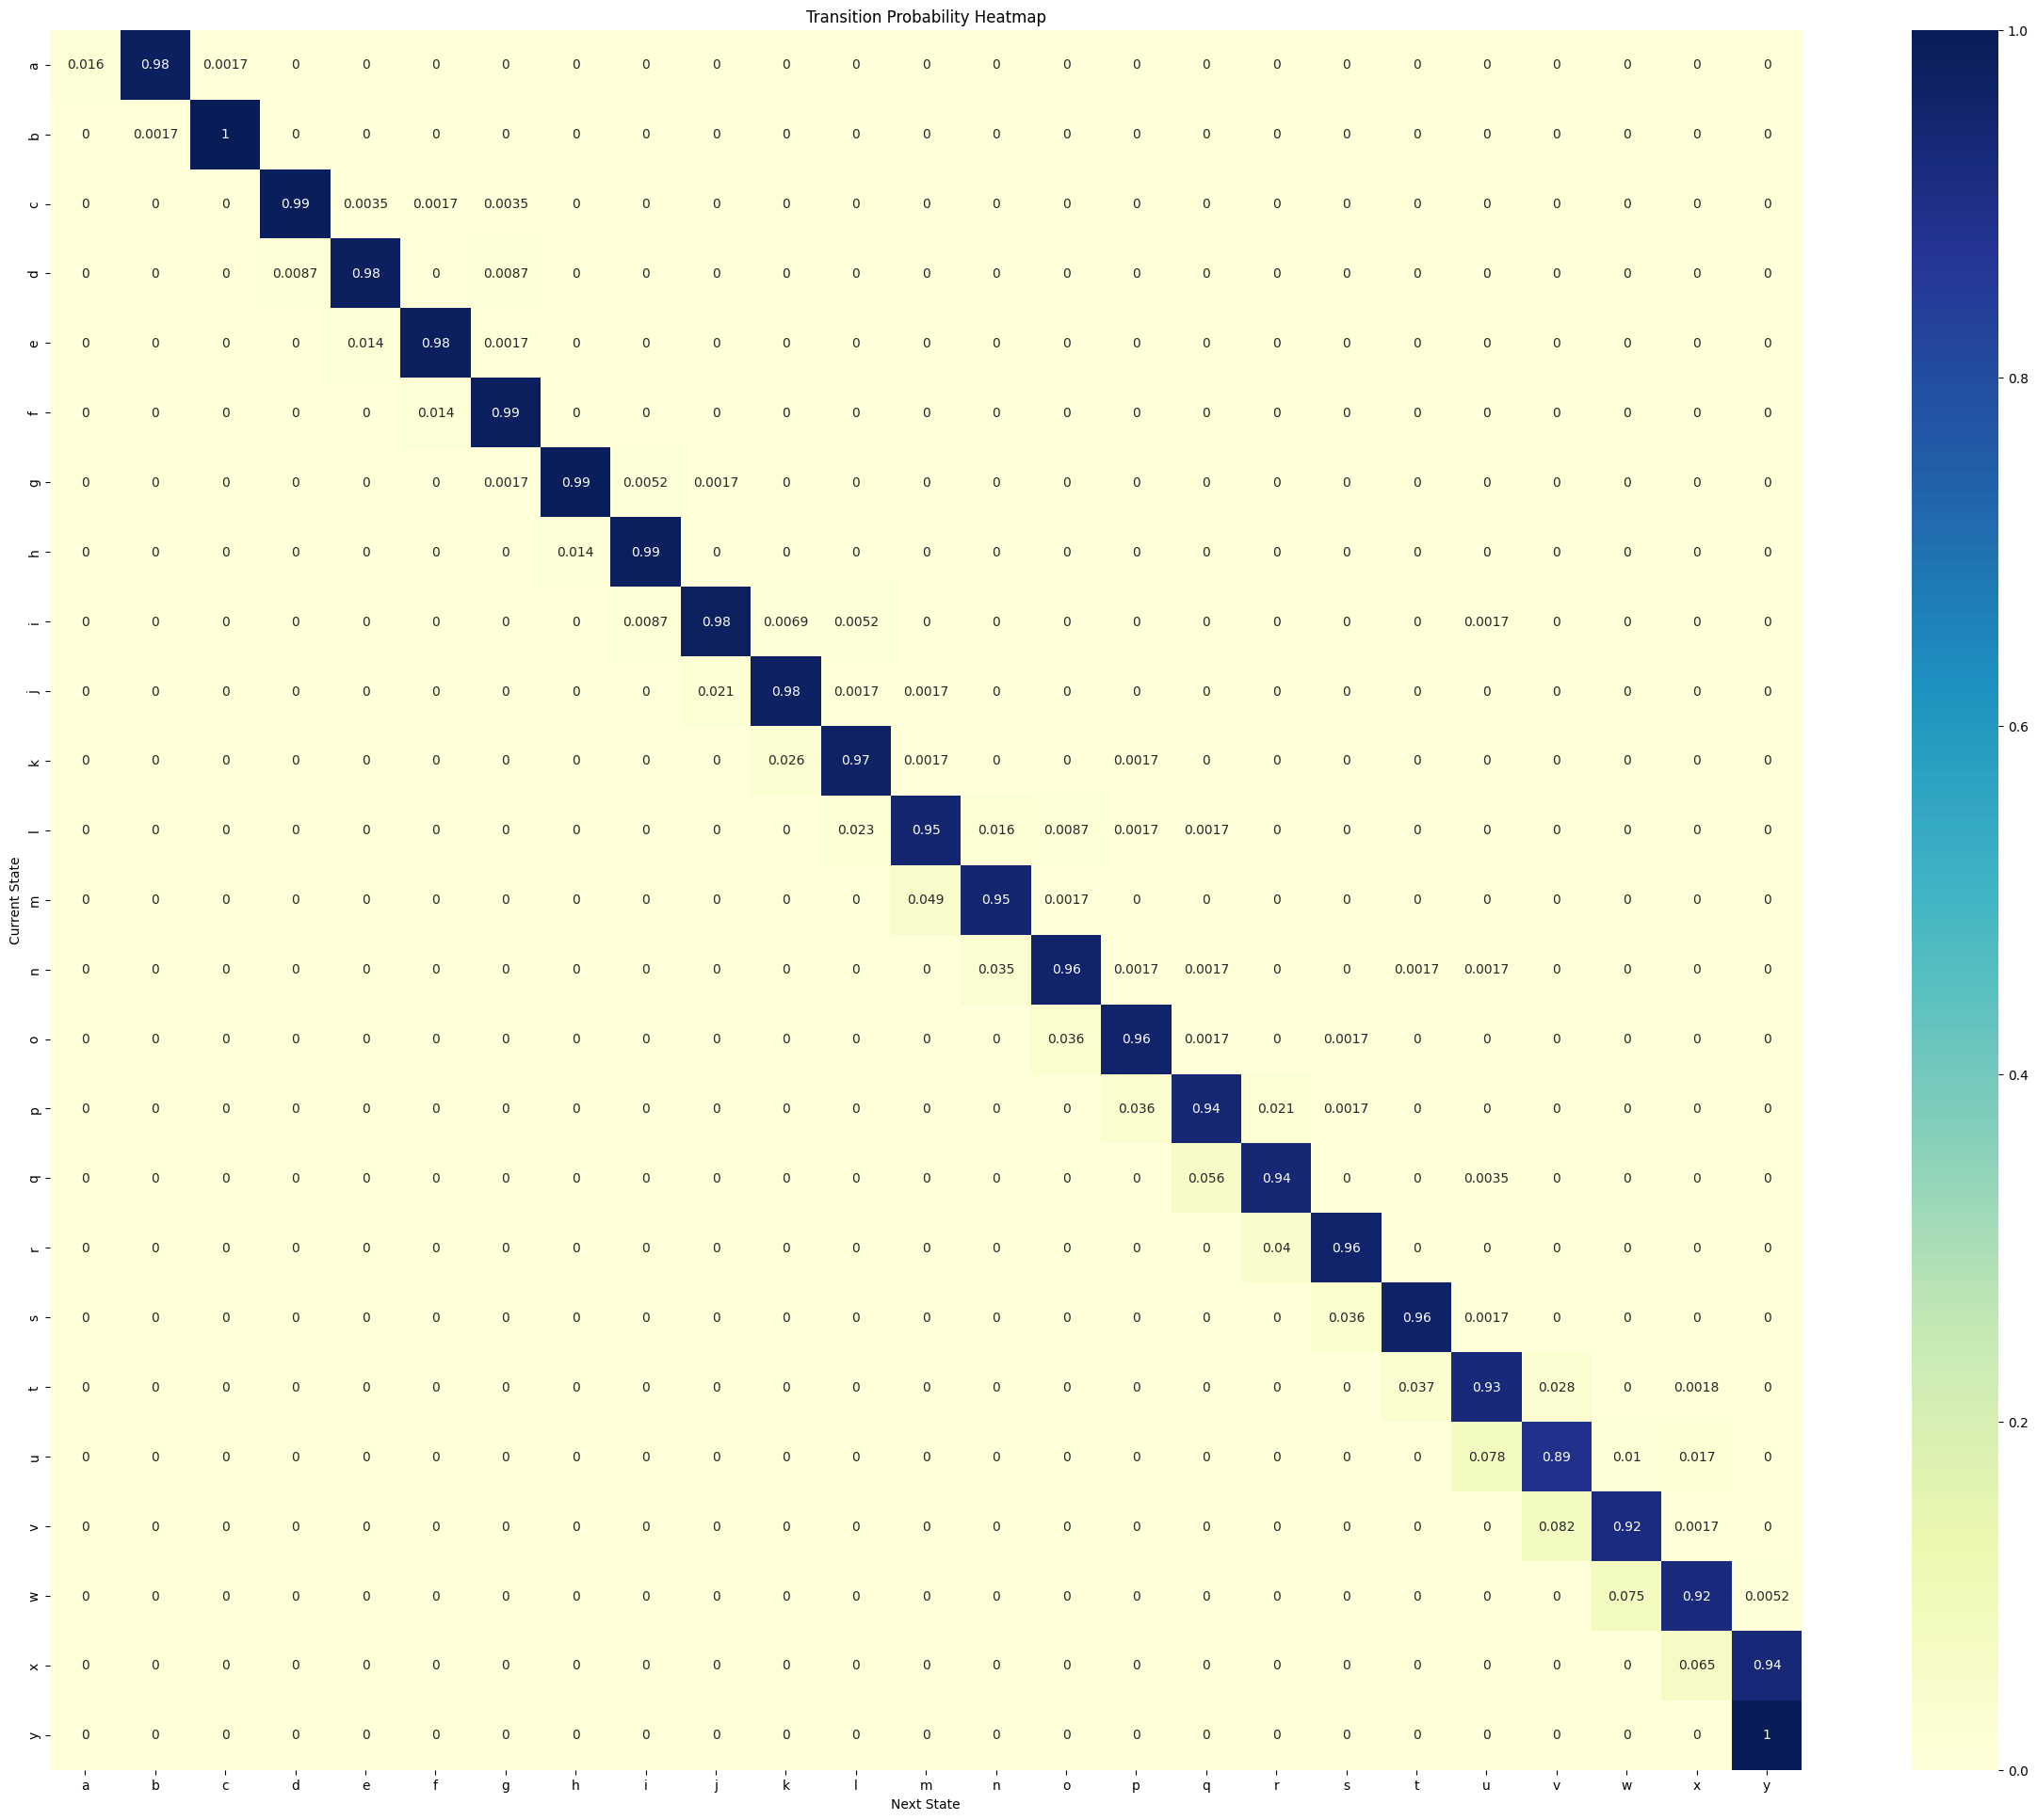

In [ ]:
# Get unique states and sort them
states = sorted(set(list(transition_probabilities.keys()) + [next_state for state in transition_probabilities.values() for next_state in state.keys()]))

# Create an empty transition matrix
transition_matrix = np.zeros((len(states), len(states)))

# Populate the transition matrix with probabilities
for i, state in enumerate(states):
    if state in transition_probabilities:
        for j, next_state in enumerate(states):
            if next_state in transition_probabilities[state]:
                transition_matrix[i, j] = transition_probabilities[state][next_state]

# Create a heatmap using Seaborn
plt.figure(figsize=(30, 24))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", xticklabels=states, yticklabels=states)
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.title("Transition Probability Heatmap")
plt.show()

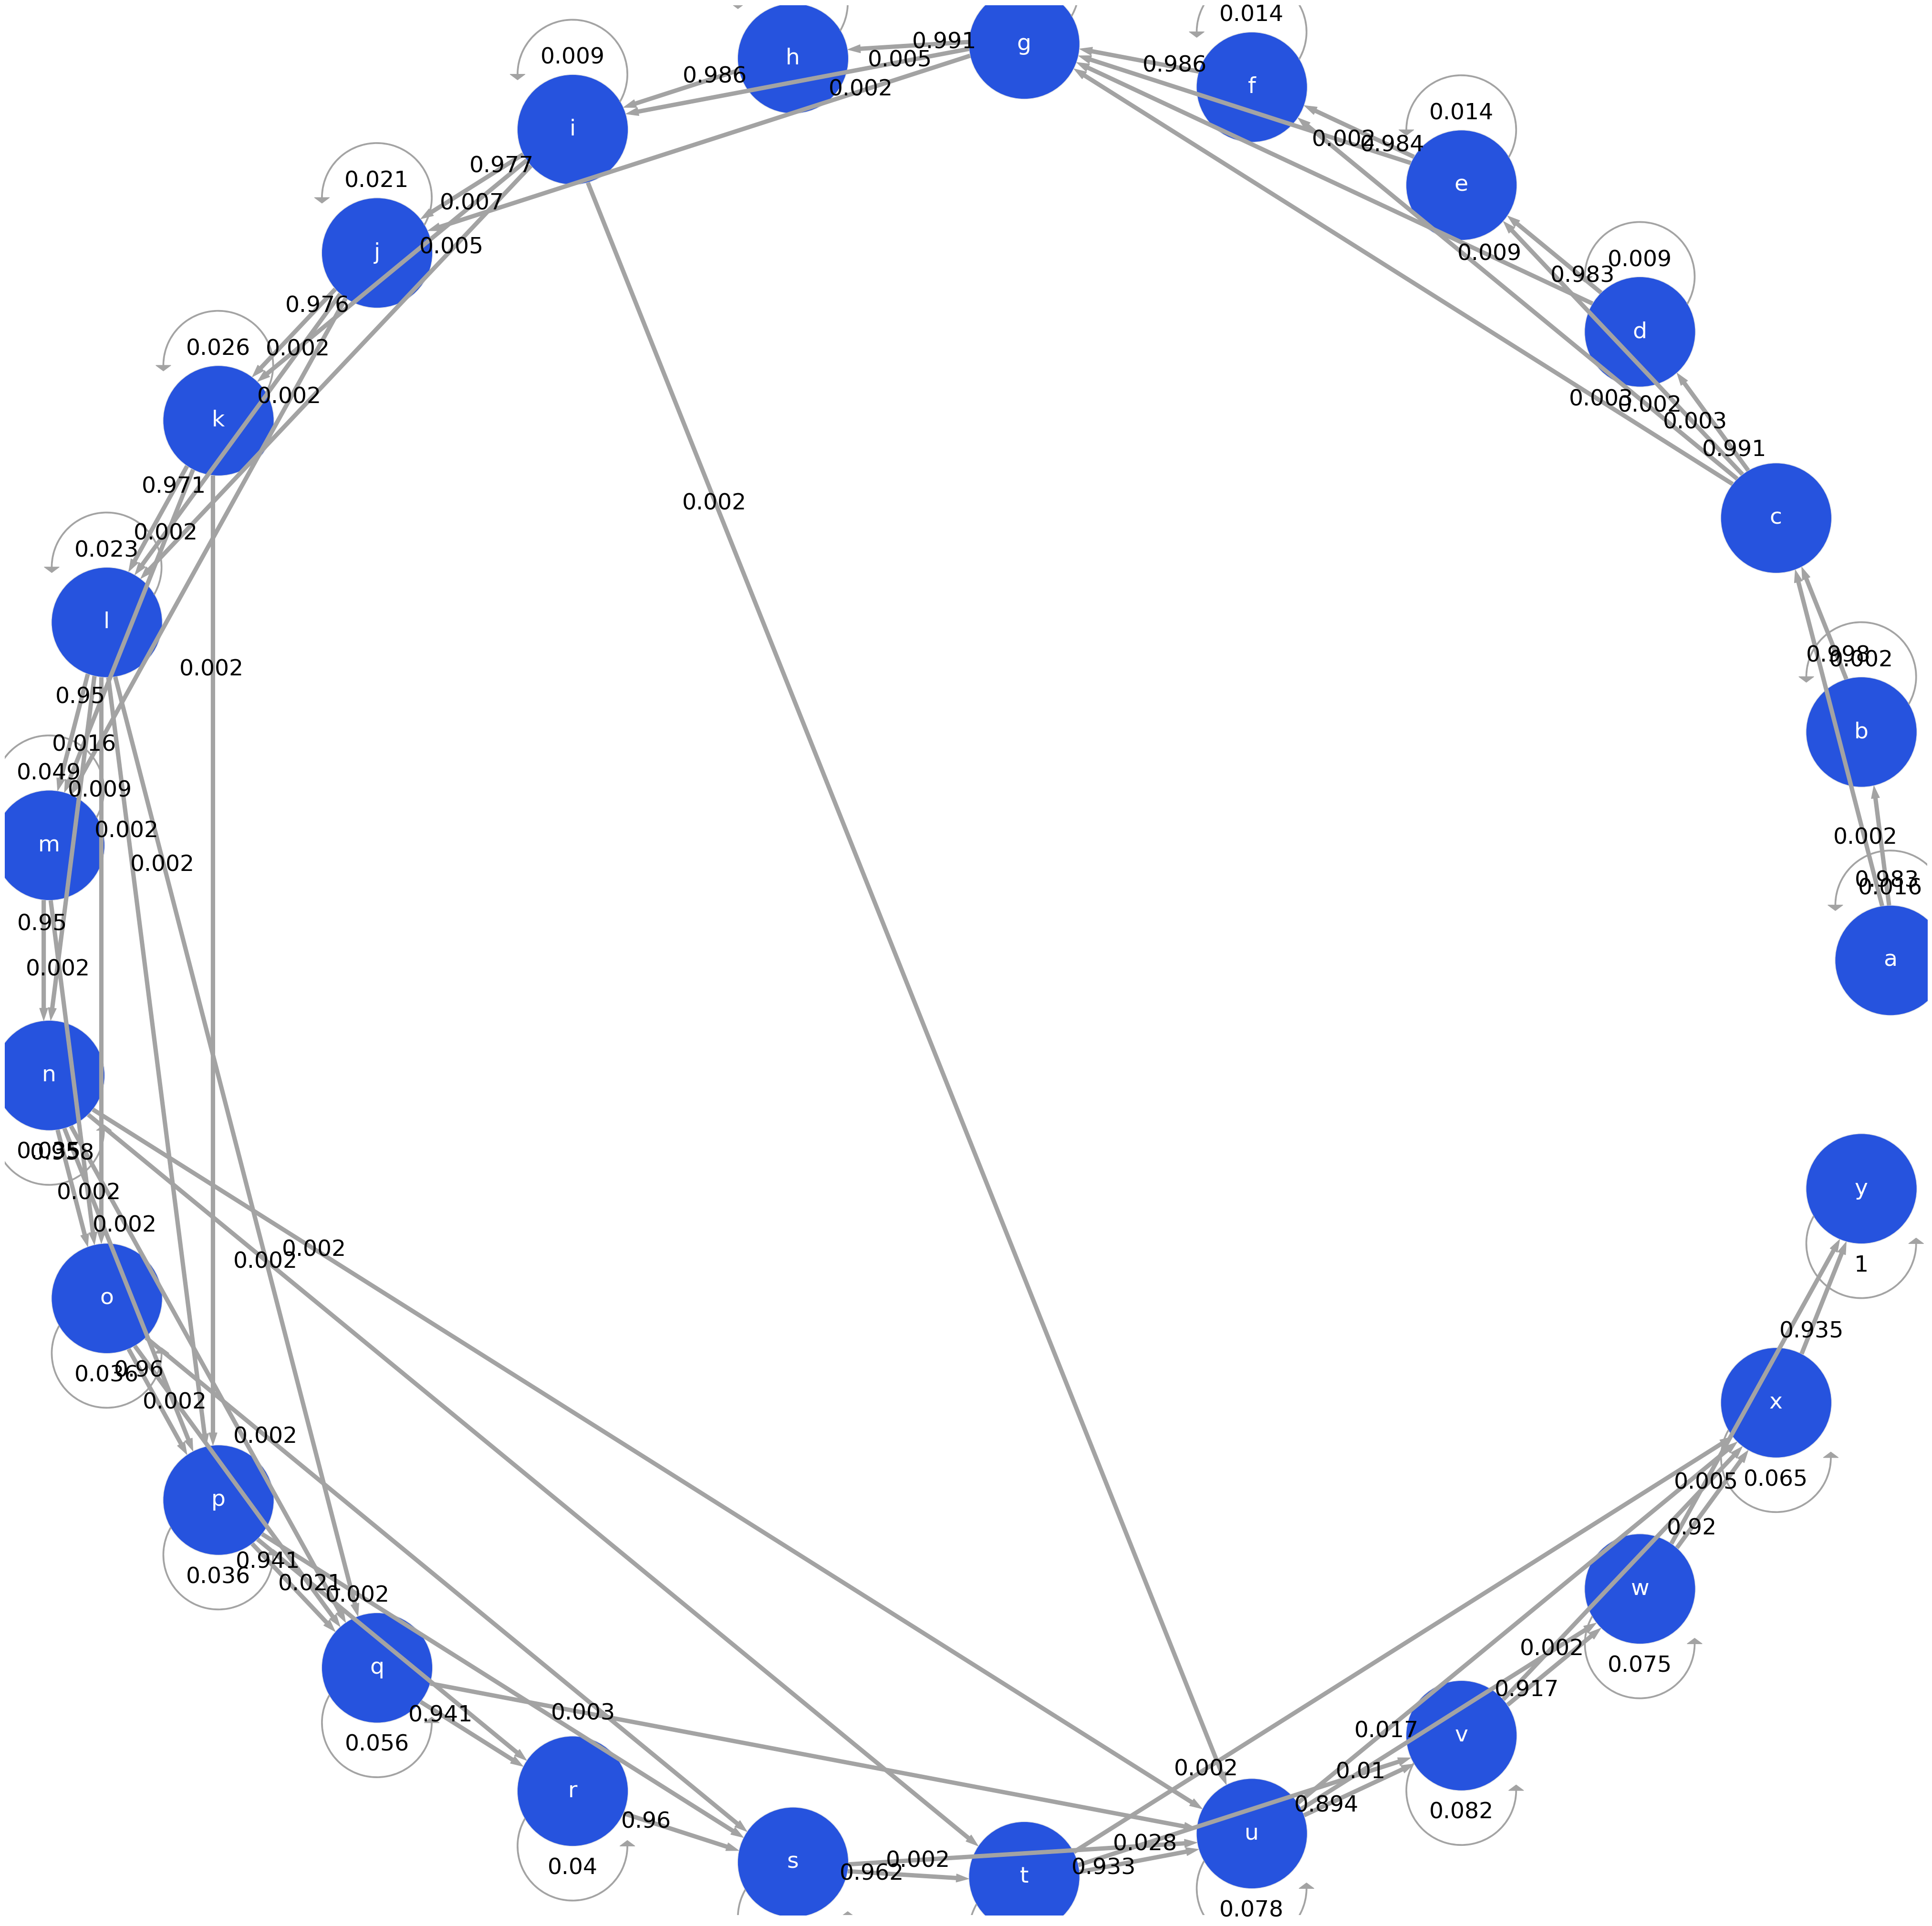

In [ ]:
from markovchain import MarkovChain
mc = MarkovChain(transition_matrix, df.columns)
mc.draw(img_path='/content/drive/MyDrive/Colab Notebooks/markov.png')

In [ ]:
print(pd. __version__)

1.5.3
